## **Dữ liệu**
---
*Bộ dữ liệu được lấy trên https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset* <br>
Bao gồm các thông tin về khoản nợ và lịch sử chi trả/giao dịch cũng như các biến nhân khẩu học liên quan tới các khách hàng ở Đài Loan từ tháng 4/2005 đến tháng 9/2005<br>



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision= 3)
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')
df0 = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')

## **Thống kê mô tả**

In [5]:
# Kiểm tra dữ liệu khuyết thiếu
df0.isnull().sum().to_frame().T

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


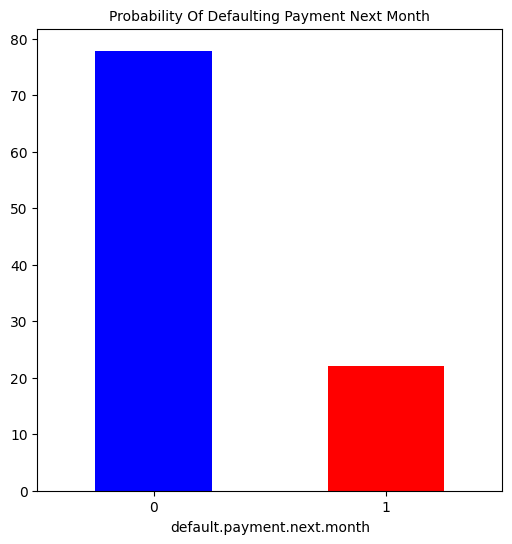

Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. 
Số lượng khách được dự đoán sẽ trả chiếm khoảng 77.88% trong khi số lượng sẽ nợ chỉ 22.12%.


In [6]:
# Kiểm tra dữ liệu đầu ra

default_count = (df0['default.payment.next.month'].value_counts(normalize=True)*100)
default_count.plot.bar(figsize=(6,6), color =['b','r'])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=10)
plt.show()
pass

print("Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. \nSố lượng khách được dự đoán sẽ trả chiếm khoảng {}% trong khi số lượng sẽ nợ chỉ {}%."
      .format(round(default_count[0],3), round(default_count[1],3)))

Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. 
Vì vậy khi đưa dữ liệu vào cần chuẩn hóa để mô hình có kết quả tốt nhất.


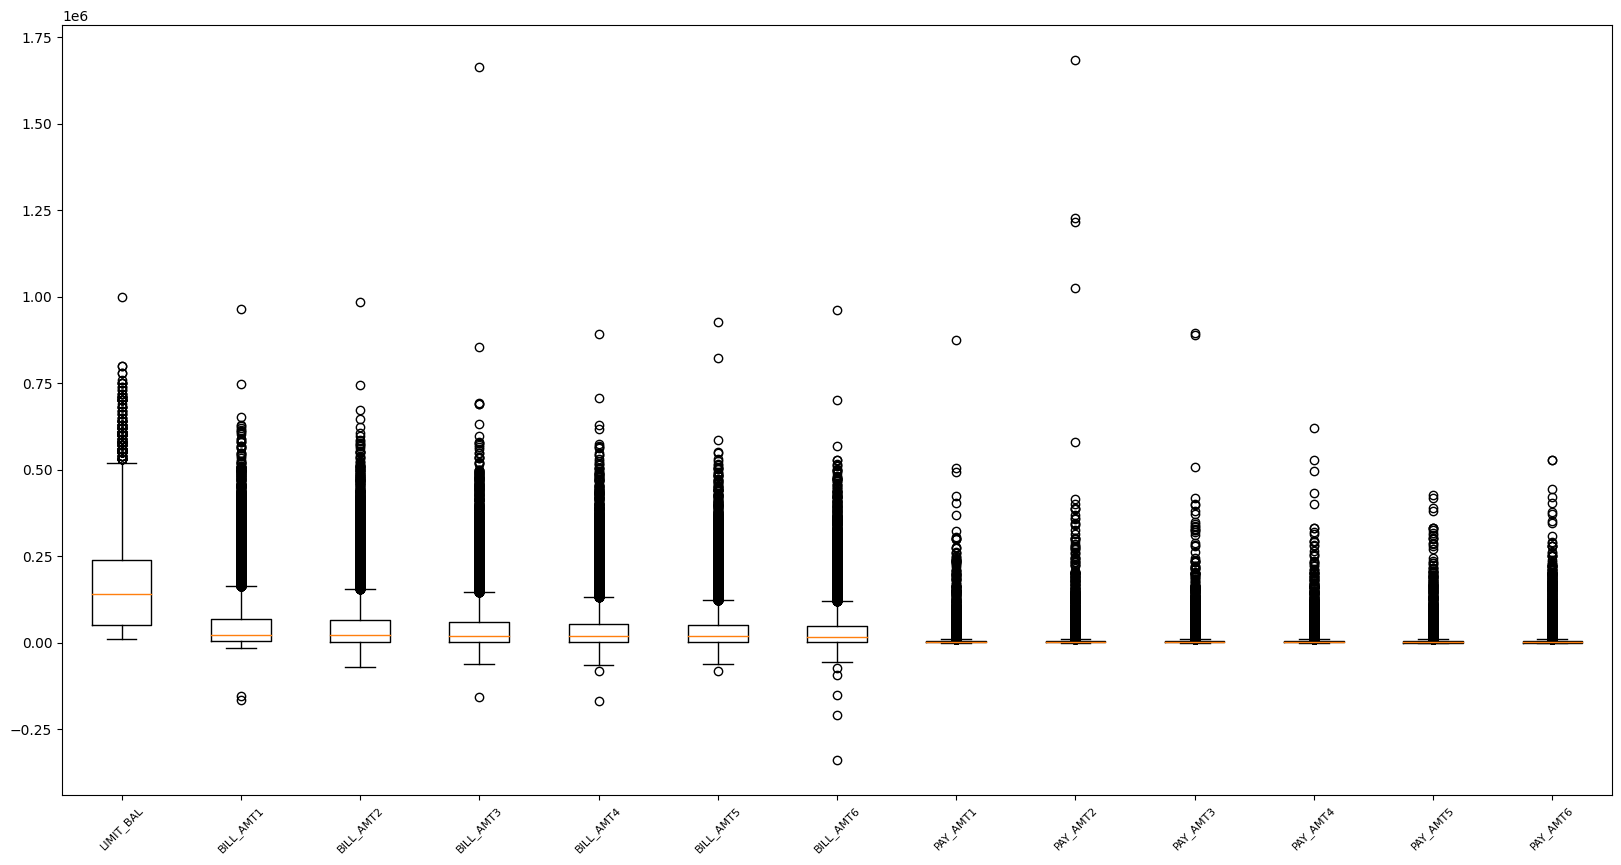

In [65]:
# Kiểm tra outlier
print("Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. \nVì vậy khi đưa dữ liệu vào cần chuẩn hóa để mô hình có kết quả tốt nhất.")

numer = df0[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig, ax1 = plt.subplots(figsize =(20, 10))
ax1
ax1.set_xticklabels(numer, rotation=45, fontsize=8) #đặt tên - kích thước cho các biến trục hoàng
plt.boxplot(numer)
plt.show()

### Default or not
---
* Nhìn chung thì nhóm có học vấn (2) đại học và tốt nghiệp cấp 3 (1) có xu hướng trả nợ chễ hạn nhiều, đặc biệt là nhóm 2
* Không có quá nhiều sự khác biệt về tình trạng kết hôn giữa các nhóm có số lượng lớn

In [66]:
df0.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.000,2,2,1,24,2,2,-1,-1,...,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000,1
1,2,120000.000,2,2,2,26,-1,2,0,0,...,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000,1
2,3,90000.000,2,2,2,34,0,0,0,0,...,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000,0
3,4,50000.000,2,2,1,37,0,0,0,0,...,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,...,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000,0


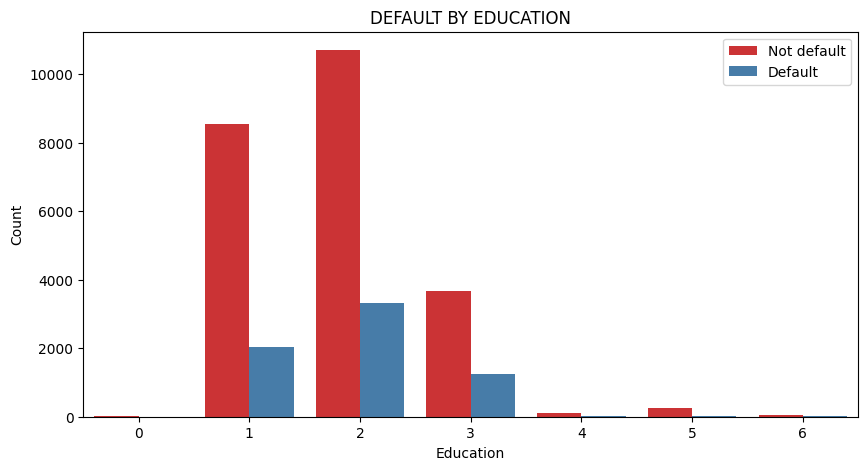

In [67]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Education', ylabel='Count')
plt.title("DEFAULT BY EDUCATION", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

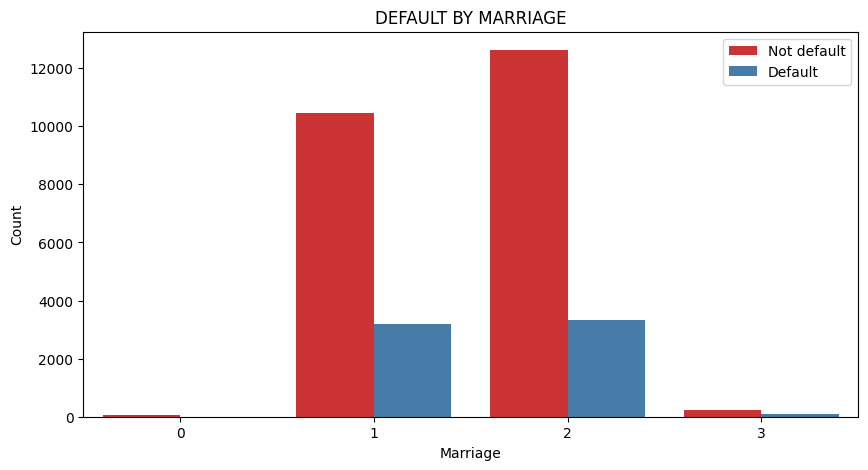

In [10]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Marriage', ylabel='Count')
plt.title("DEFAULT BY MARRIAGE", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

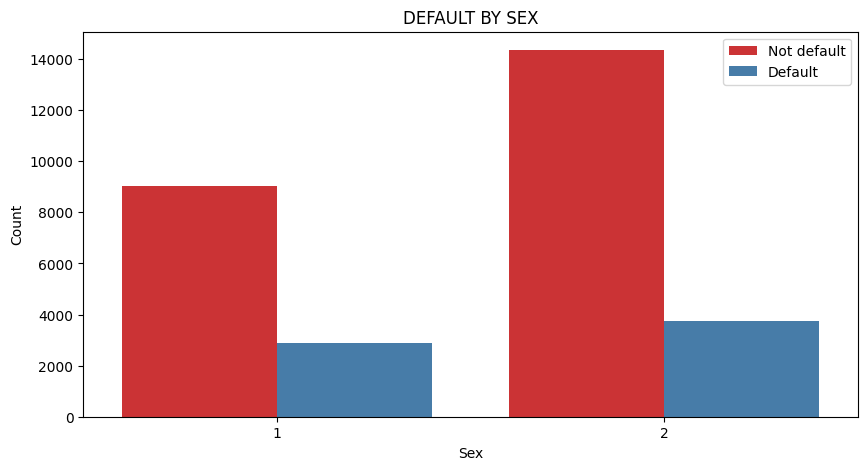

In [90]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="SEX", hue="default.payment.next.month", data=df0, palette = 'Set1')
ax.set(xlabel='Sex', ylabel='Count')
plt.title("DEFAULT BY SEX", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

Ở đây có thể thấy phân phối khách hàng nữ mà nợ xấu có độ lệch cao hơn nam. Nhóm có tỉ lệ nợ tốt là nữ cũng có xu hướng phân phối lệch trái và giống với nhóm của cùng giới tính 


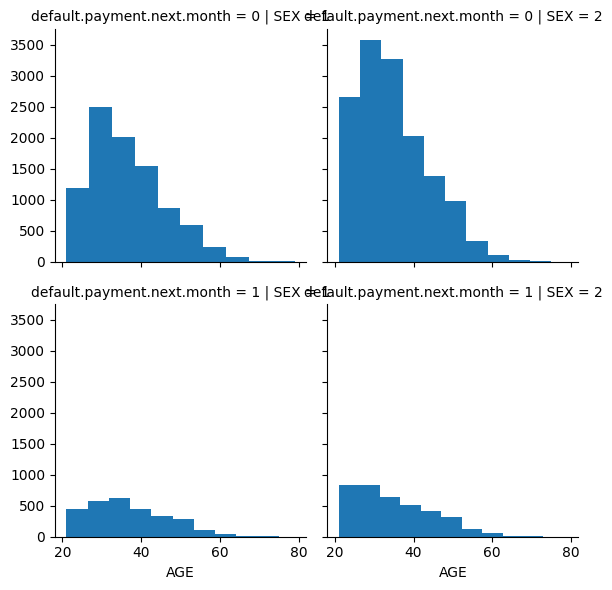

In [19]:
print("Ở đây có thể thấy phân phối khách hàng nữ mà nợ xấu có độ lệch cao hơn nam. Nhóm có tỉ lệ nợ tốt là nữ cũng có xu hướng phân phối lệch trái và giống với nhóm của cùng giới tính ")
g =sns.FacetGrid(df0, row='default.payment.next.month',col='SEX')
g.map(plt.hist,'AGE')
pass

In [79]:
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] != 'object':
        num_col.append(x)

for col in num_col:
    print(col)
    print(df[col].unique())

ID
[    1     2     3 ... 29998 29999 30000]
LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX
[2 1]
EDUCATION
[2 1 3 5 4 6 0]
MARRIAGE
[1 2 3 0]
AGE
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70

In [80]:
num_col.remove('ID')
num_col.remove('SEX')
num_col.remove('EDUCATION')
num_col.remove('MARRIAGE')
num_col.remove('default.payment.next.month')

Số biến định lượng:  20


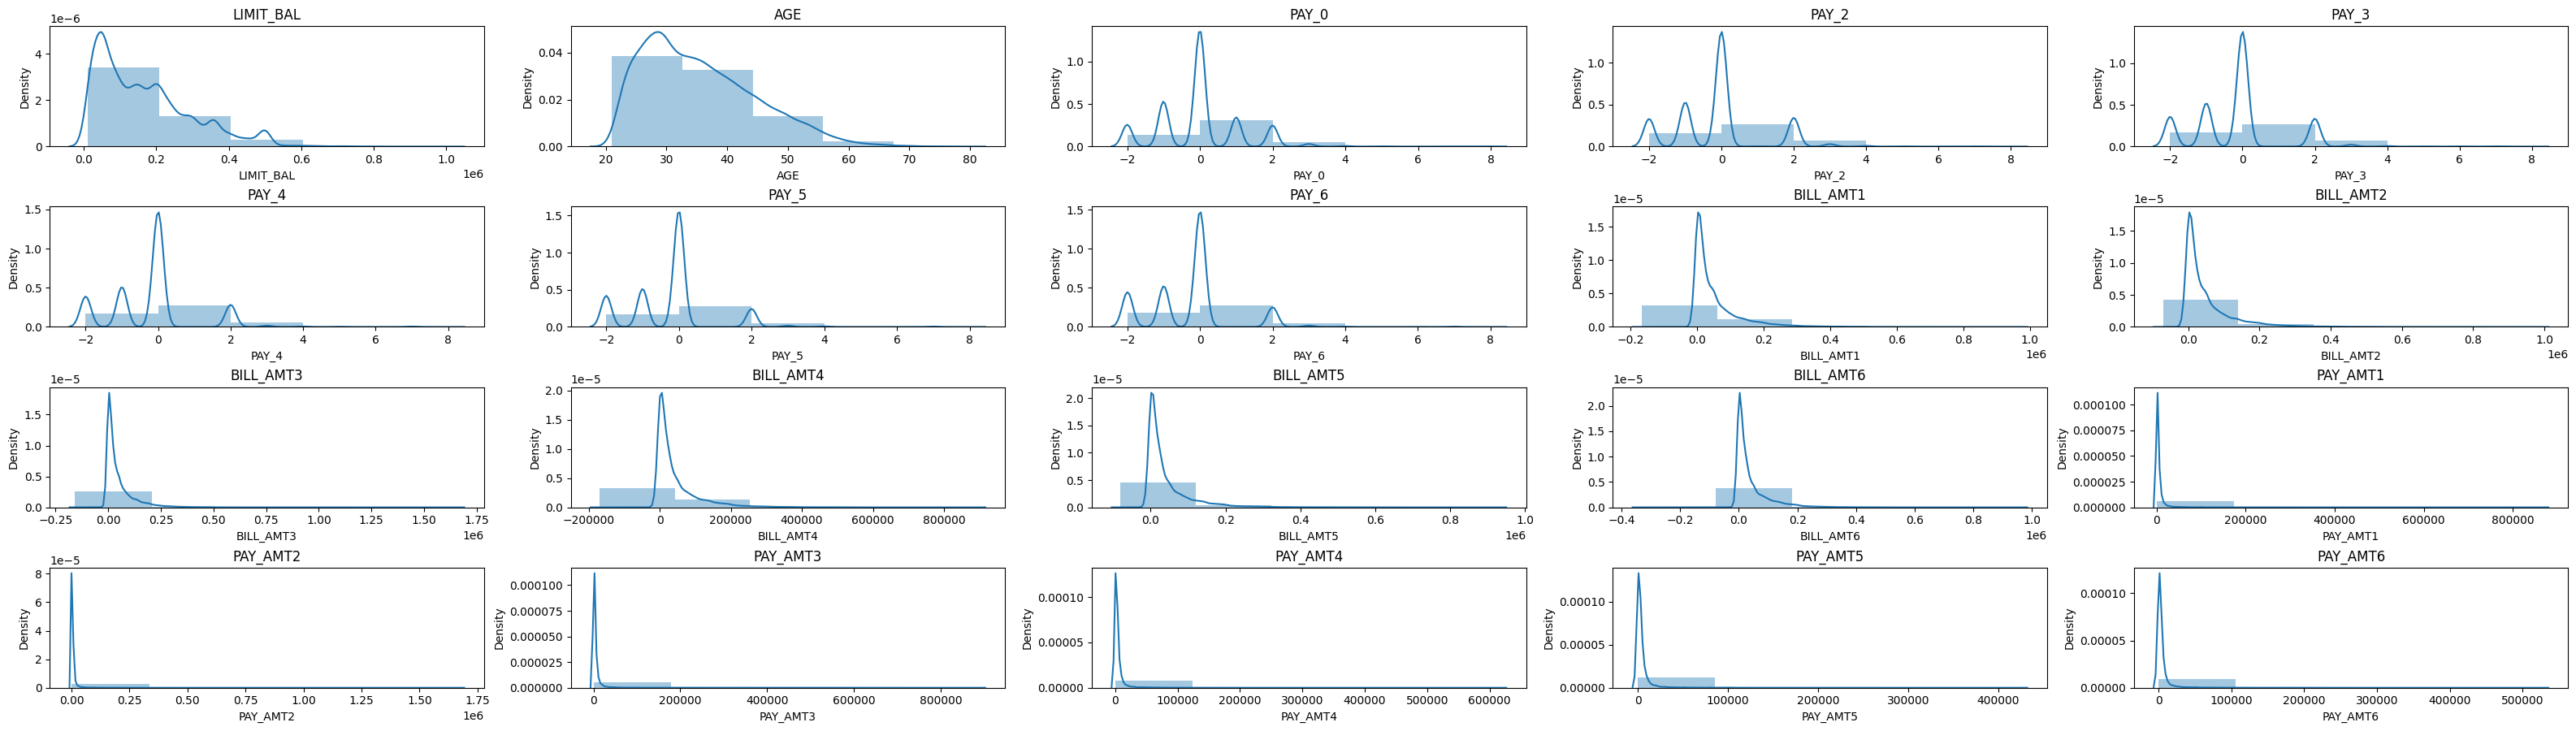

In [27]:
# Mô tả biến định lượng

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def distribution_numeric(df, numeric_cols, row= 9, col=5, figsize=(40, 25), bins = 5):
    print('Số biến định lượng: ', len(numeric_cols))
    #assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

distribution_numeric(df, num_col)

Các biến có dạng PAY có skew rất nhọn và lệch sang 1 phía. Vì vậy có thể skew lại để mô hình train có hiệu quả hơn

## **TIỀN XỬ LÝ DỮ LIỆU**

Thay thế các dữ liệu đã đề cập phía trên và loại bỏ biến đầu ra khỏi đầu vào chính

In [81]:
df =df.rename(columns={"default.payment.next.month": "default","PAY_0": "PAY_1"})
df['EDUCATION'].replace([5,6],4)
df['MARRIAGE'].replace(0,3)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

In [82]:
#Thay thế các giá trị lỗi
df['PAY_1'] =df['PAY_1'].replace(-2,-1)
df['PAY_2'] =df['PAY_2'].replace(-2,-1)
df['PAY_3'] =df['PAY_3'].replace(-2,-1)
df['PAY_4'] =df['PAY_4'].replace(-2,-1)
df['PAY_5'] =df['PAY_5'].replace(-2,-1)
df['PAY_6'] =df['PAY_6'].replace(-2,-1)

In [71]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.000,2,2,1,24,2,2,-1,-1,...,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000,1
1,2,120000.000,2,2,2,26,-1,2,0,0,...,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000,1
2,3,90000.000,2,2,2,34,0,0,0,0,...,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000,0
3,4,50000.000,2,2,1,37,0,0,0,0,...,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,...,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000,0


In [83]:
for i in list(df.columns[-13:-2]):
    df[i] = df[i].replace(0.000, 1)
    df[i] = abs(df[i])


In [84]:
#Loại bỏ output khỏi đầu vào chính
df1 =df.drop(columns= ['default','ID'])

In [85]:
# Do phân phối dữ liệu bị lệch nên cần phải skew lại
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df1[x], ax=ax[0,0])
    sns.distplot(np.log(df1[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df1[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df1[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df1[x].skew().round(2))
    print(np.log(df1[x]).skew().round(2))
    print(np.sqrt(df1[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df1[x])[0]).skew().round(2))

In [86]:
for i in list(df1.columns[-12:-1]):
    df1[i] = stats.boxcox(df1[i])[0]

df1['LIMIT_BAL'] = stats.boxcox(df1['LIMIT_BAL'])[0]
df1['AGE'] =stats.boxcox(df1['AGE'])[0]

In [87]:
#Chuyển các biến str thành dạng categories
df1 = pd.get_dummies(data=df1, columns=['SEX', 'MARRIAGE', 'EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], dtype = float)
df2 = df['default']

In [88]:
df1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,49.082,1.649,24.040,22.447,14.676,0.000,0.000,0.000,0.000,13.660,...,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,81.543,1.666,21.725,19.144,21.413,22.309,21.912,20.558,0.000,15.122,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2,75.229,1.721,40.279,33.219,32.601,32.574,31.646,30.081,17.869,16.845,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,63.745,1.736,45.301,45.172,44.875,38.548,37.139,34.961,19.248,18.200,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,63.745,1.808,29.558,26.324,41.510,35.791,33.612,31.588,19.248,36.778,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## **Giảm chiều dữ liệu**
---
*Ở đây sẽ dùng phương pháp giảm chiều dữ liệu Random forest dựa trên lượng thông tin nhận về càng lớn càng tốt. Và dùng làm đầu vào cho Neural network ở phía sau* 

Quá trình cũng sử dụng Smote do các features có độ lớn khác nhau và Scale để chuẩn hóa dữ liệu đầu vào loại bỏ các outliers.

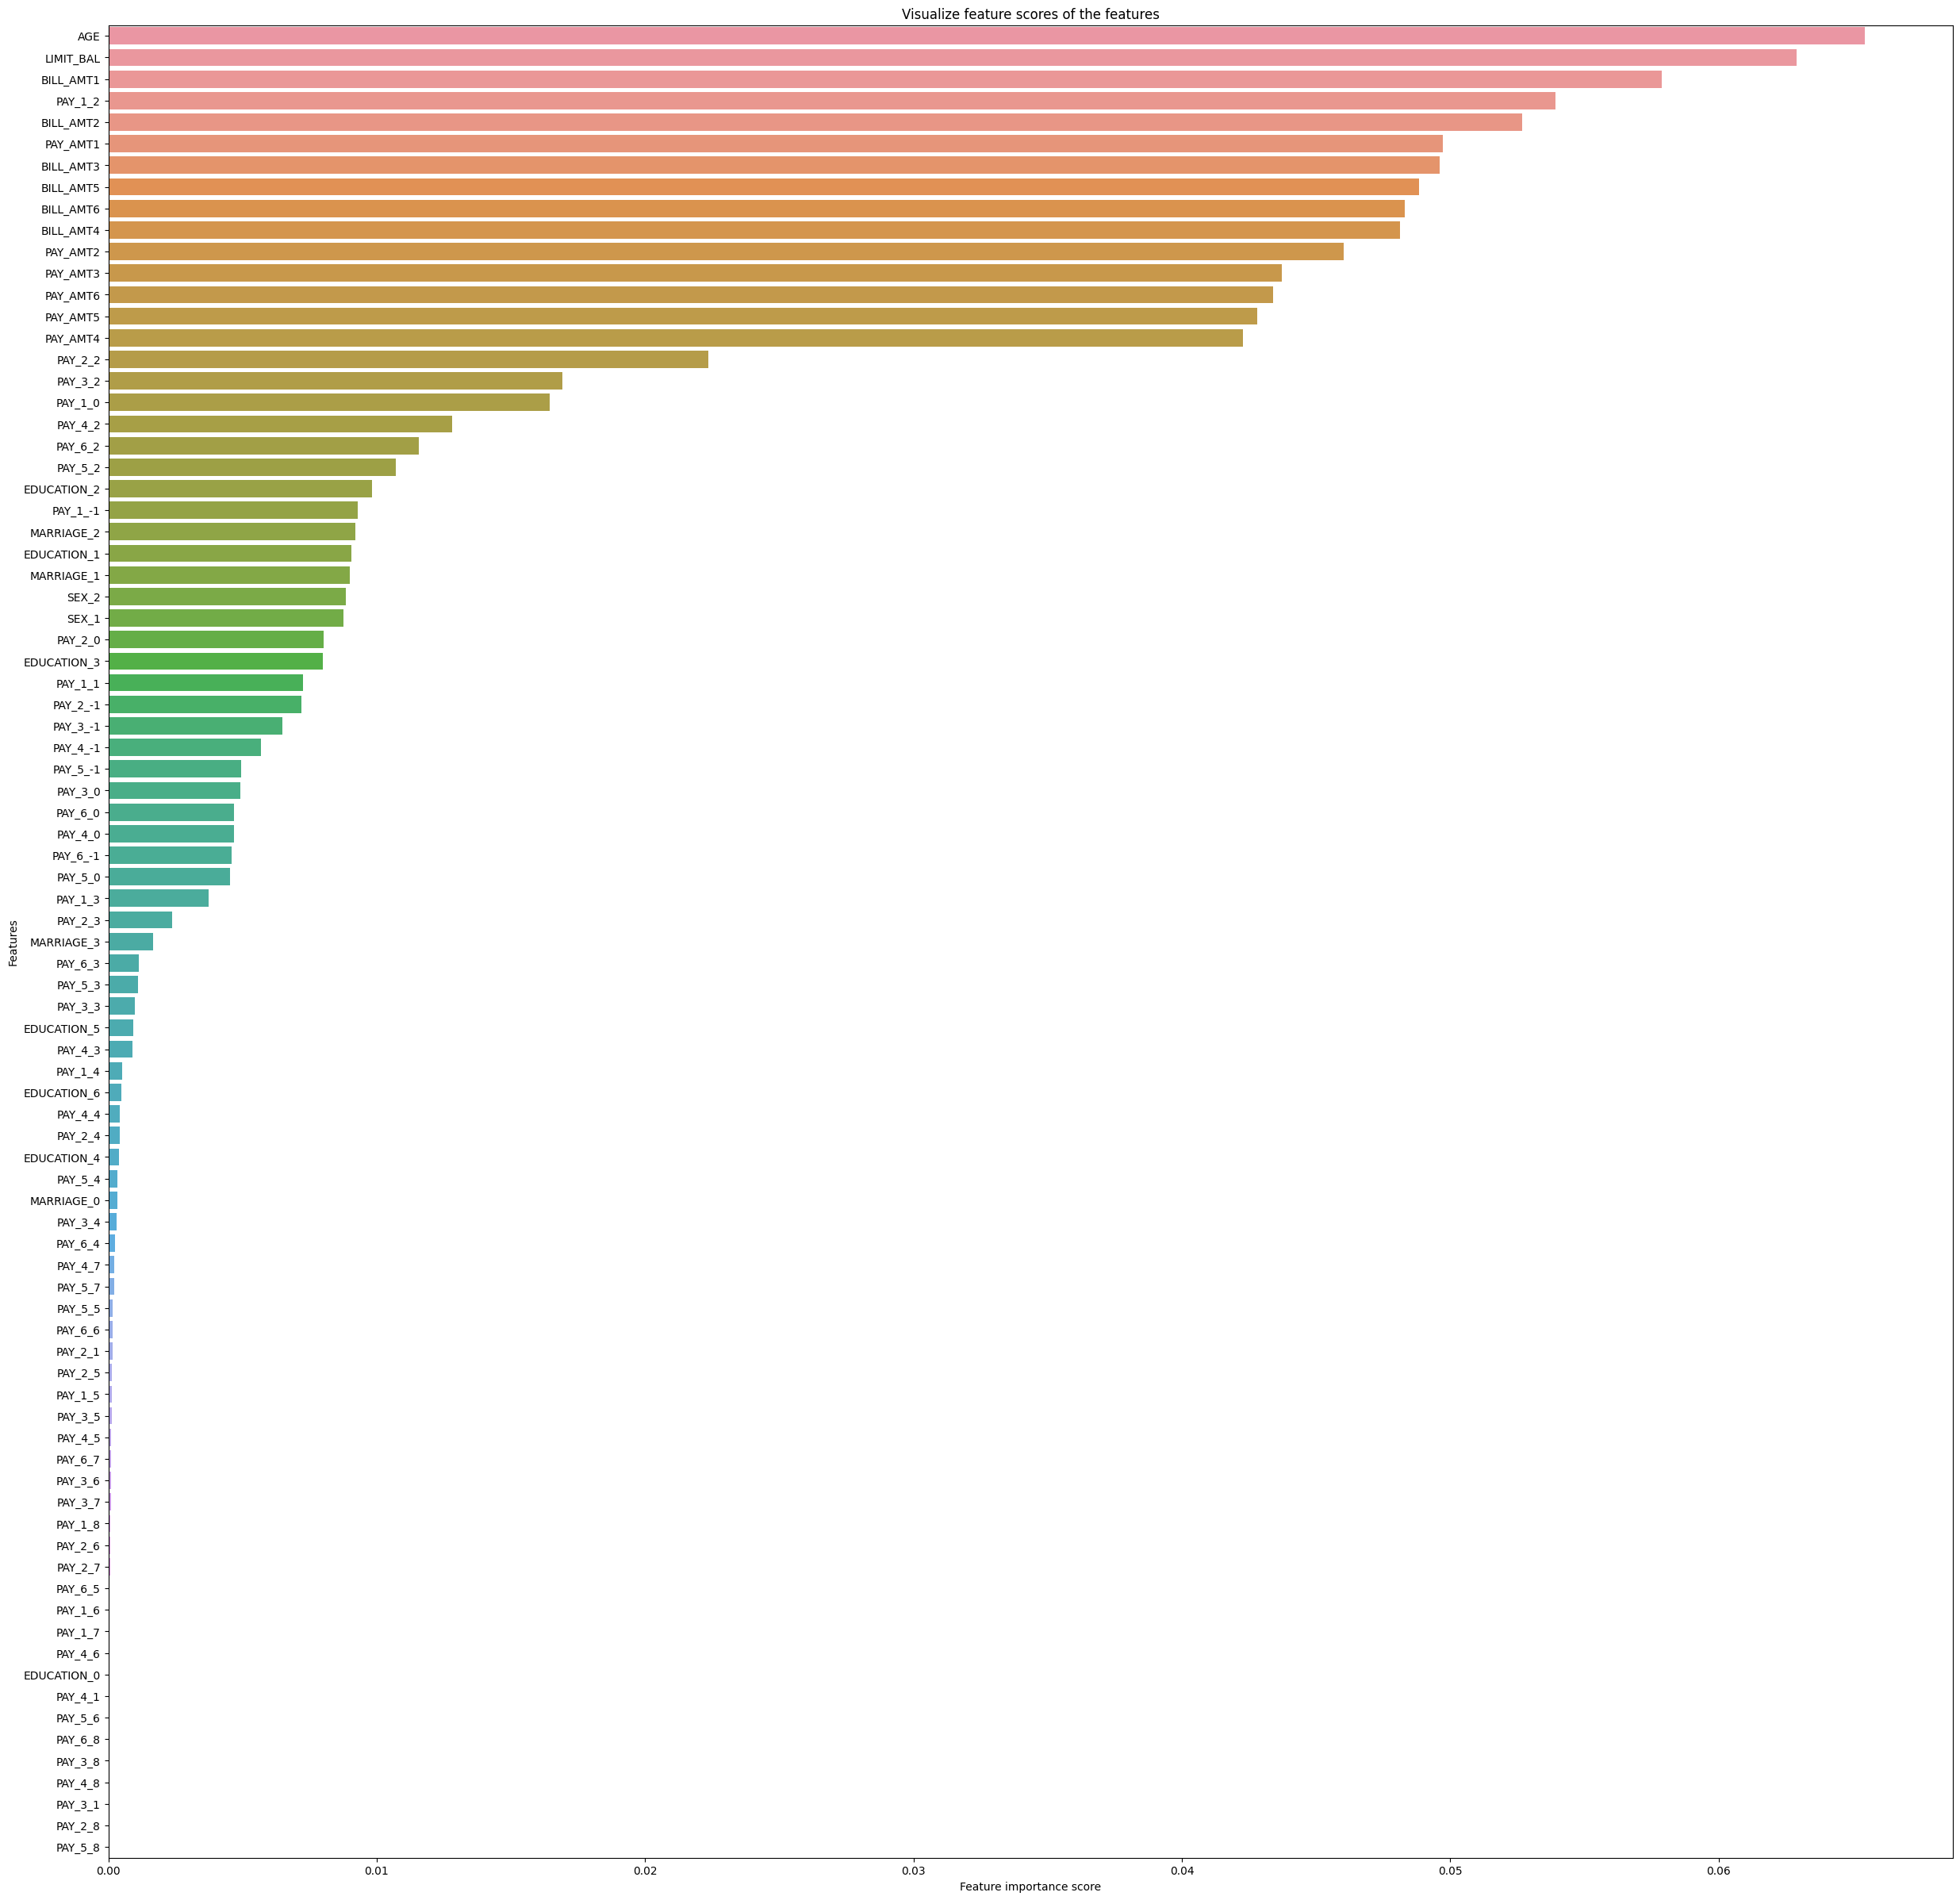

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(df1, df2)

feature_scores = pd.Series(clf.feature_importances_, index=df1.columns).sort_values(ascending=False)
feature_scores

f, ax = plt.subplots(figsize=(30, 30))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [92]:
# Lựa chọn các features có importance lớn hơn mức trung vị để giữ được các biến định tính có ý nghĩa trong mô hình

feature_scores2 = feature_scores[feature_scores >= feature_scores.median()]
feature_scores2

AGE           0.065
LIMIT_BAL     0.063
BILL_AMT1     0.058
PAY_1_2       0.054
BILL_AMT2     0.053
PAY_AMT1      0.050
BILL_AMT3     0.050
BILL_AMT5     0.049
BILL_AMT6     0.048
BILL_AMT4     0.048
PAY_AMT2      0.046
PAY_AMT3      0.044
PAY_AMT6      0.043
PAY_AMT5      0.043
PAY_AMT4      0.042
PAY_2_2       0.022
PAY_3_2       0.017
PAY_1_0       0.016
PAY_4_2       0.013
PAY_6_2       0.012
PAY_5_2       0.011
EDUCATION_2   0.010
PAY_1_-1      0.009
MARRIAGE_2    0.009
EDUCATION_1   0.009
MARRIAGE_1    0.009
SEX_2         0.009
SEX_1         0.009
PAY_2_0       0.008
EDUCATION_3   0.008
PAY_1_1       0.007
PAY_2_-1      0.007
PAY_3_-1      0.006
PAY_4_-1      0.006
PAY_5_-1      0.005
PAY_3_0       0.005
PAY_6_0       0.005
PAY_4_0       0.005
PAY_6_-1      0.005
PAY_5_0       0.005
PAY_1_3       0.004
PAY_2_3       0.002
MARRIAGE_3    0.002
dtype: float64

In [93]:
df3 = df1.drop(columns = feature_scores[feature_scores < feature_scores.median()].to_frame().T.iloc[:,])
df3

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_3_2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_6_-1,PAY_6_0,PAY_6_2
0,49.082,1.649,24.040,22.447,14.676,0.000,0.000,0.000,0.000,13.660,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
1,81.543,1.666,21.725,19.144,21.413,22.309,21.912,20.558,0.000,15.122,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
2,75.229,1.721,40.279,33.219,32.601,32.574,31.646,30.081,17.869,16.845,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,63.745,1.736,45.301,45.172,44.875,38.548,37.139,34.961,19.248,18.200,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,63.745,1.808,29.558,26.324,41.510,35.791,33.612,31.588,19.248,36.778,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,96.546,1.746,63.522,63.148,63.440,50.704,37.818,30.276,27.996,31.939,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
29996,86.785,1.763,19.127,19.452,22.990,28.959,24.319,0.000,18.815,20.976,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
29997,55.130,1.736,23.451,22.924,21.574,35.765,34.206,31.675,0.000,0.000,...,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
29998,72.781,1.755,19.007,50.849,49.891,44.848,29.896,39.270,49.103,20.799,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000


In [94]:
feature_scores2 = np.array([feature_scores2])
feature_scores2.shape

(1, 43)

In [97]:
#Trước khi đưa dữ liệu vào cần SMOTE để tránh những cột có giá trị quá lớn trong khi các cột biến phân loại có giá trị quá nhỏ

from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state= None ,k_neighbors= 5)

X_smote, y_smote = smote.fit_resample(df3, df2)

print(f'''Shape of X before SMOTE: {df3.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts()


Shape of X before SMOTE: (30000, 43)
Shape of X after SMOTE: (46728, 43)

Balance of positive and negative classes (%):


default
1    23364
0    23364
Name: count, dtype: int64

In [98]:
#Scale dữ liệu
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_smote_scaled=mms.fit_transform(X_smote)
x_smote_scaled

array([[0.084, 0.131, 0.257, ..., 1.   , 0.   , 0.   ],
       [0.389, 0.206, 0.232, ..., 0.   , 0.   , 1.   ],
       [0.33 , 0.437, 0.431, ..., 0.   , 1.   , 0.   ],
       ...,
       [0.222, 0.176, 0.473, ..., 0.   , 1.   , 0.   ],
       [0.44 , 0.561, 0.134, ..., 0.434, 0.   , 0.566],
       [0.537, 0.247, 0.393, ..., 1.   , 0.   , 0.   ]])

## **Dự đoán bằng NEURAL NETWORK**


In [99]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote_scaled,y_smote,test_size=0.25,random_state=30)
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))

Variables in Train Set : 35046 & Test Set : 11682


In [100]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model
pass

In [101]:
#Nhập các thông số đầu vào cho mạng neuron 
model.add(tf.keras.layers.Dense(units=43,activation='sigmoid', use_bias = True)) #input layer với 43 đầu vào
model.add(tf.keras.layers.Dense(units=88,activation='sigmoid', use_bias = True)) #hidden layer với số node = n1*2 +2 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                   #output layer

In [102]:
#Hàm loss và optimizer
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [103]:
#Hàm loss và optimizer
from keras import models, layers, optimizers, regularizers
learning_rate = 0.01
model.compile(optimizer=optimizers.Adam(lr = learning_rate),loss= 'binary_crossentropy',metrics=['accuracy'])

In [104]:
training = model.fit(x_train,y_train,batch_size=32,epochs= 50)
#https://www.kaggle.com/code/timniven/feedforward-neural-network-tutorial -------- link vẽ biểu đồ

Epoch 1/50
1096/1096 [==============================] - 4s 2ms/step - loss: 0.5554 - accuracy: 0.7189
Epoch 2/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.5001 - accuracy: 0.7601
Epoch 3/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.4418 - accuracy: 0.7946
Epoch 4/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8120
Epoch 5/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3934 - accuracy: 0.8257
Epoch 6/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8311
Epoch 7/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3676 - accuracy: 0.8390
Epoch 8/50
1096/1096 [==============================] - 2s 2ms/step - loss: 0.3607 - accuracy: 0.8414
Epoch 9/50
1096/1096 [==============================] - 2s 1ms/step - loss: 0.3551 - accuracy: 0.8456
Epoch 10/50
1096/1096 [==============================] - 2s 1ms/step - loss: 0.349

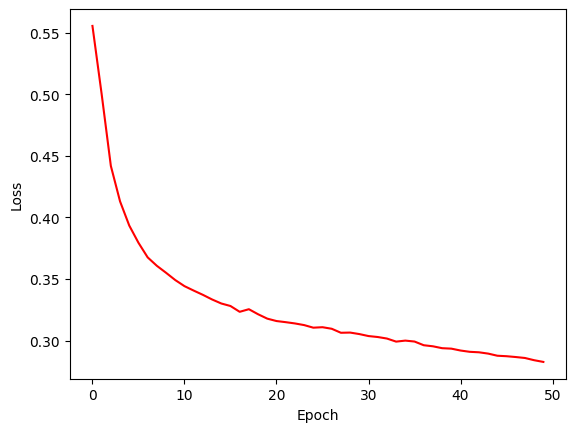

In [105]:
plt.plot(training.history['loss'],'r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
pass

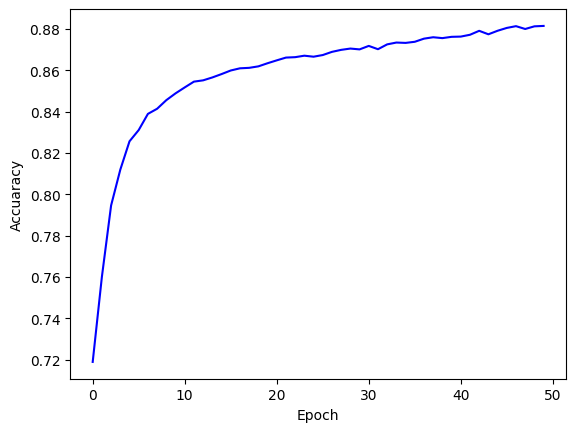

In [106]:
plt.plot(training.history['accuracy'], 'b')
plt.xlabel("Epoch")
plt.ylabel("Accuaracy")
plt.show()
pass

In [107]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(x_test))
roc_auc = metrics.auc(fpr, tpr)
#https://www.kaggle.com/code/thejas2002/notebook6ca73be3d5#4:-TRAIN-AND-EVALUATE-AN-XGBOOST-CLASSIFIER - link vẽ biểu đồ 2
#https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#17.-Classification-metrices- --- link vẽ biểu đồ 3

366/366 [==============================] - 1s 2ms/step


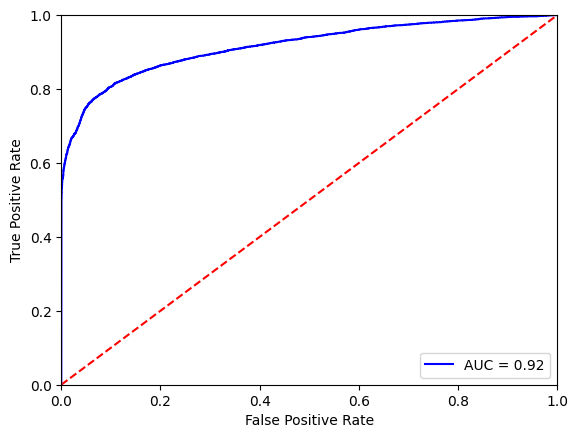

In [108]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc =  'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
pass

In [109]:
# Độ chính xác của các tập dữ liệu
train_score = model.evaluate(x_train, y_train, verbose =2)
test_score = model.evaluate(x_test, y_test,verbose =2)
val_score = model.evaluate(x_smote_scaled, y_smote, verbose =2)
pass

1096/1096 - 2s - loss: 0.2790 - accuracy: 0.8848 - 2s/epoch - 2ms/step
366/366 - 1s - loss: 0.3593 - accuracy: 0.8537 - 573ms/epoch - 2ms/step
1461/1461 - 2s - loss: 0.2991 - accuracy: 0.8770 - 2s/epoch - 1ms/step


## **KẾT QUẢ**

In [110]:
print('Độ chính xác của model trên tập training là {}%'.format(round(train_score[1],3)*100))
print('Độ chính xác của model trên tập test là {}%'.format(round(test_score[1],4)*100))
print('ROC_AUC là {}%'.format(round(roc_auc,4)*100))

pass

Độ chính xác của model trên tập training là 88.5%
Độ chính xác của model trên tập test là 85.37%
ROC_AUC là 91.64%
